##### Title: Predicting Company Profit Based on Expenditure and State Information
##### Objective:
The goal of this analysis is to build a predictive model that can accurately forecast a company's 
profit based on its expenditures in productivity, management, and promotions, as well as its state 
of operation. This model will aid in identifying the key drivers of profit and help companies 
optimize their budget allocations to maximize profitability.
##### Dataset Description:
###### The dataset consists of the following columns:
 1. Productivity_Exp: Amount spent on productivity-related expenses (in thousands of dollars).
 2. Management_Exp: Amount spent on management-related expenses (in thousands of dollars).
 3. Promotions_Exp: Amount spent on promotional activities (in thousands of dollars).
 4. State: The state in which the company operates.
 5. Profit: The profit of the company (in thousands of dollars)

### Setting Up EDA Environment :
> setting up the environment for data analysis using pandas, numpy, and matplotlib.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
import warnings
warnings.filterwarnings("ignore")

### Data Collection  :
 > Collecting data on productivity, management, promotions, state, and profit.

In [2]:
#Reading Data from a csv File`
df1=pd.read_csv('companies.csv')
df1.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State,Profit
0,220349.20,236897.80,521784.10,Texas,242261.83
1,217597.70,251377.59,493898.53,Illinois,241792.06
2,208441.51,201145.55,457934.54,Washington,241050.39
3,199372.41,218671.85,433199.62,Texas,232901.99
4,197107.34,191391.77,416168.42,Washington,216187.94


## Asking Questions :
1. What are some common features to explore during data analysis ? 
2. What is the correlation coefficient between productivity expenses and profit, and how does it indicate the strength of their relationship?
3. Does an increase in promotional expenses lead to higher profits?
4. What do the box plots reveal about the profit distribution across Texas, Illinois, and Washington?
5. what relationship can be observed between ‘Features’ and ‘Profit’?
6. How does one-hot encoding handle categorical variables in a dataset?
7. What is the purpose of min-max scaling in data preprocessing?
8. How can the effectiveness of each expenditure category be quantified in terms of its impact on profit?
9. How can we divide data into training and testing sets in machine learning?
10. Which model is being used as the starting point for training in this project?
11. What metrics can be used to evaluate model performance ?
12. How can the coefficients of a linear regression model be used to evaluate its performance in predicting profit?

### Initial Checkup :
> Exploring the dataset to understand its structure, null values, and potential features.

In [3]:
df1.shape

(50, 5)

In [4]:
df1.isnull().sum()

Productivity_Exp    0
Management_Exp      0
Promotions_Exp      0
State               0
Profit              0
dtype: int64

> There is no null values

In [5]:
# Statistical Summary of Columns:
print("Statistical summary of the DataFrame columns:")
print(df1.describe())

Statistical summary of the DataFrame columns:
       Productivity_Exp  Management_Exp  Promotions_Exp         Profit
count         50.000000       50.000000       50.000000      50.000000
mean      128721.615600   221344.639600   261025.097800  162012.639200
std        45902.256482    28017.802755   122290.310726   40306.180338
min        55000.000000   151283.140000    50000.000000   64681.400000
25%        94936.370000   203730.875000   179300.132500  140138.902500
50%       128051.080000   222699.795000   262716.240000  157978.190000
75%       156602.800000   244842.180000   349469.085000  189765.977500
max       220349.200000   282645.560000   521784.100000  242261.830000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Productivity_Exp  50 non-null     float64
 1   Management_Exp    50 non-null     float64
 2   Promotions_Exp    50 non-null     float64
 3   State             50 non-null     object 
 4   Profit            50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**1.What are some common features to explore during data analysis ?**

In [7]:
df1.columns

Index(['Productivity_Exp', 'Management_Exp', 'Promotions_Exp', 'State',
       'Profit'],
      dtype='object')

In [8]:
df2=df1.drop(['Management_Exp'],axis='columns')
df2.head()

,Productivity_Exp,Promotions_Exp,State,Profit
0,220349.20,521784.10,Texas,242261.83
1,217597.70,493898.53,Illinois,241792.06
2,208441.51,457934.54,Washington,241050.39
3,199372.41,433199.62,Texas,232901.99
4,197107.34,416168.42,Washington,216187.94


In [9]:
df2['State'].unique()

array(['Texas', 'Illinois', 'Washington'], dtype=object)

### Data Visualization :


**2. What is the correlation coefficient between productivity expenses and profit?**

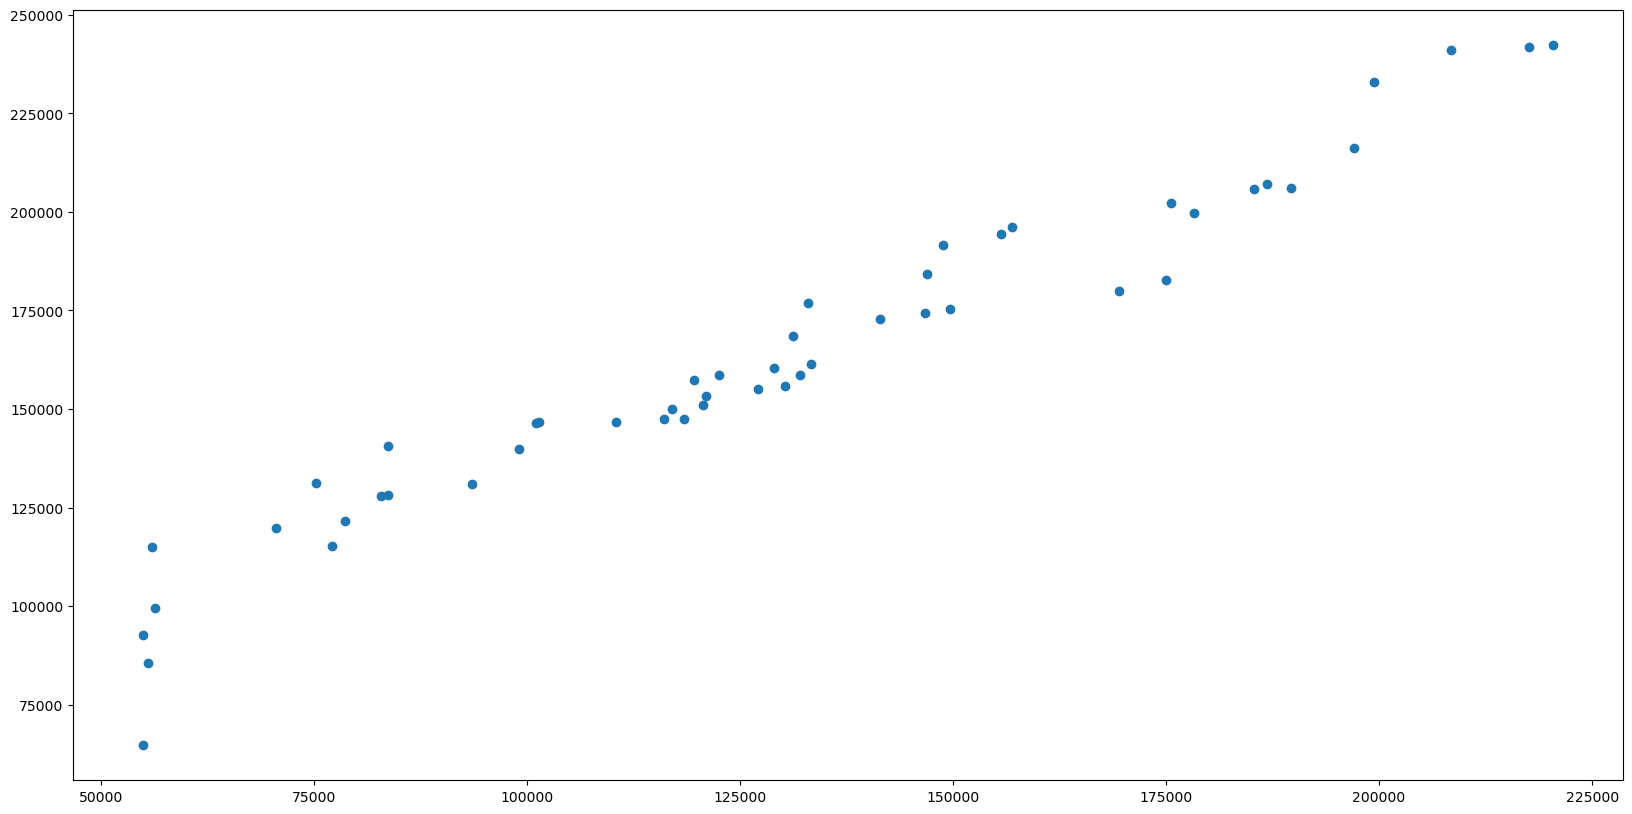

In [10]:
# Scatter plot: Productivity Expenses vs. Profit
plt.scatter(df2["Productivity_Exp"], df2["Profit"])

> Relationship between productivity expenses and profit. Each dot represents a company’s data point, showing how their productivity expenses impact their profit.

**3. Does an increase in promotional expenses lead to higher profits?**

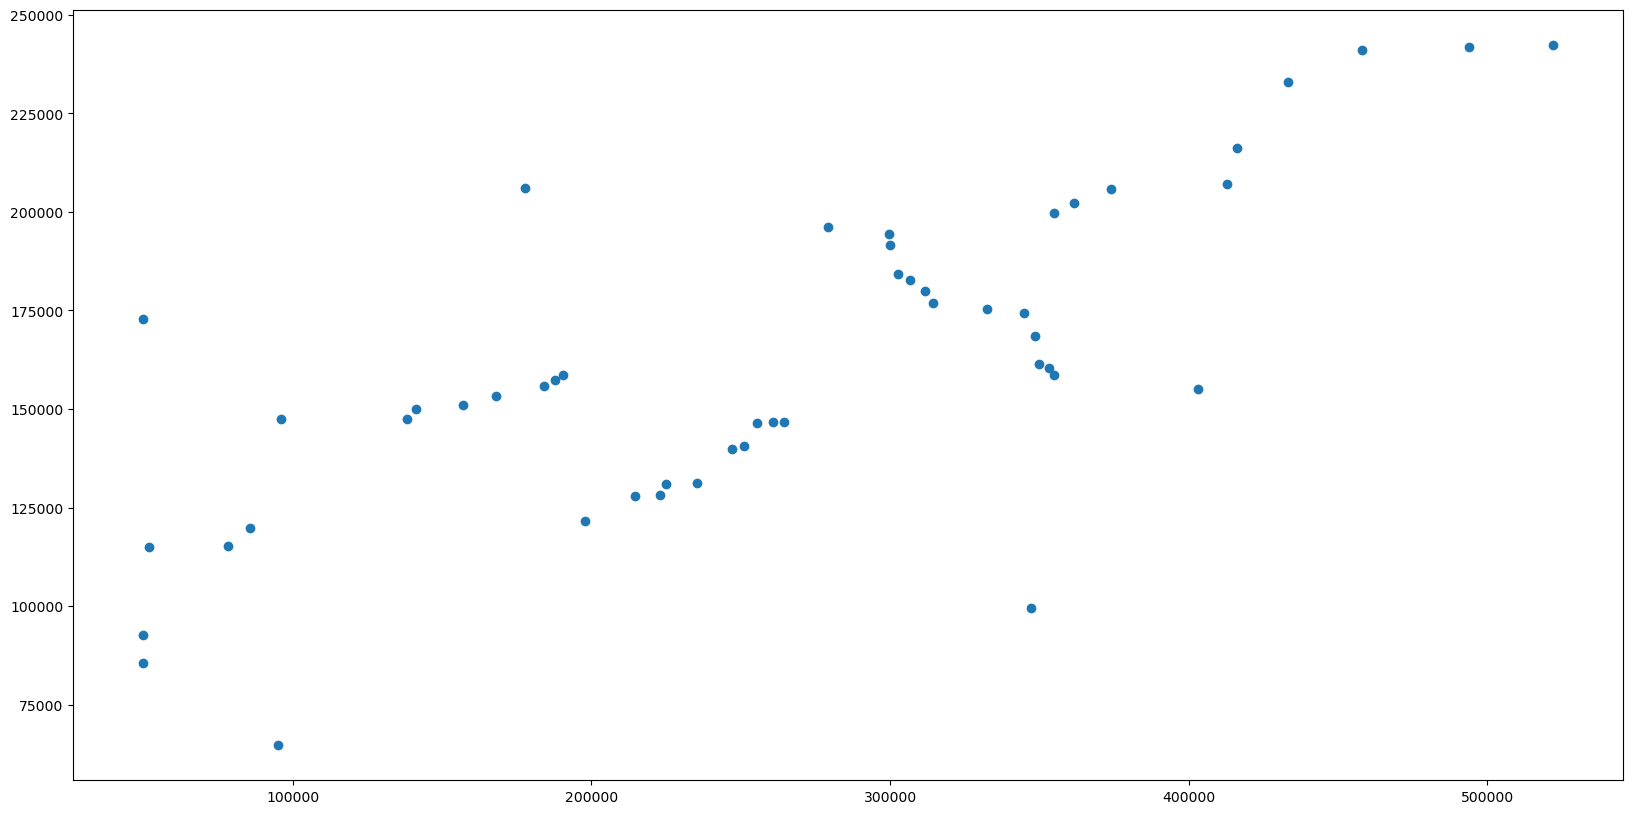

In [11]:
plt.scatter(df2["Promotions_Exp"], df2["Profit"])

> The above scatter plot shows how promotional expenses relate to profit for each data point. and visualizes how promotional expenses impact profit across different data points.


**4. What do the box plots reveal about the profit distribution across Texas, Illinois, and Washington?**

<Axes: xlabel='State', ylabel='Profit'>

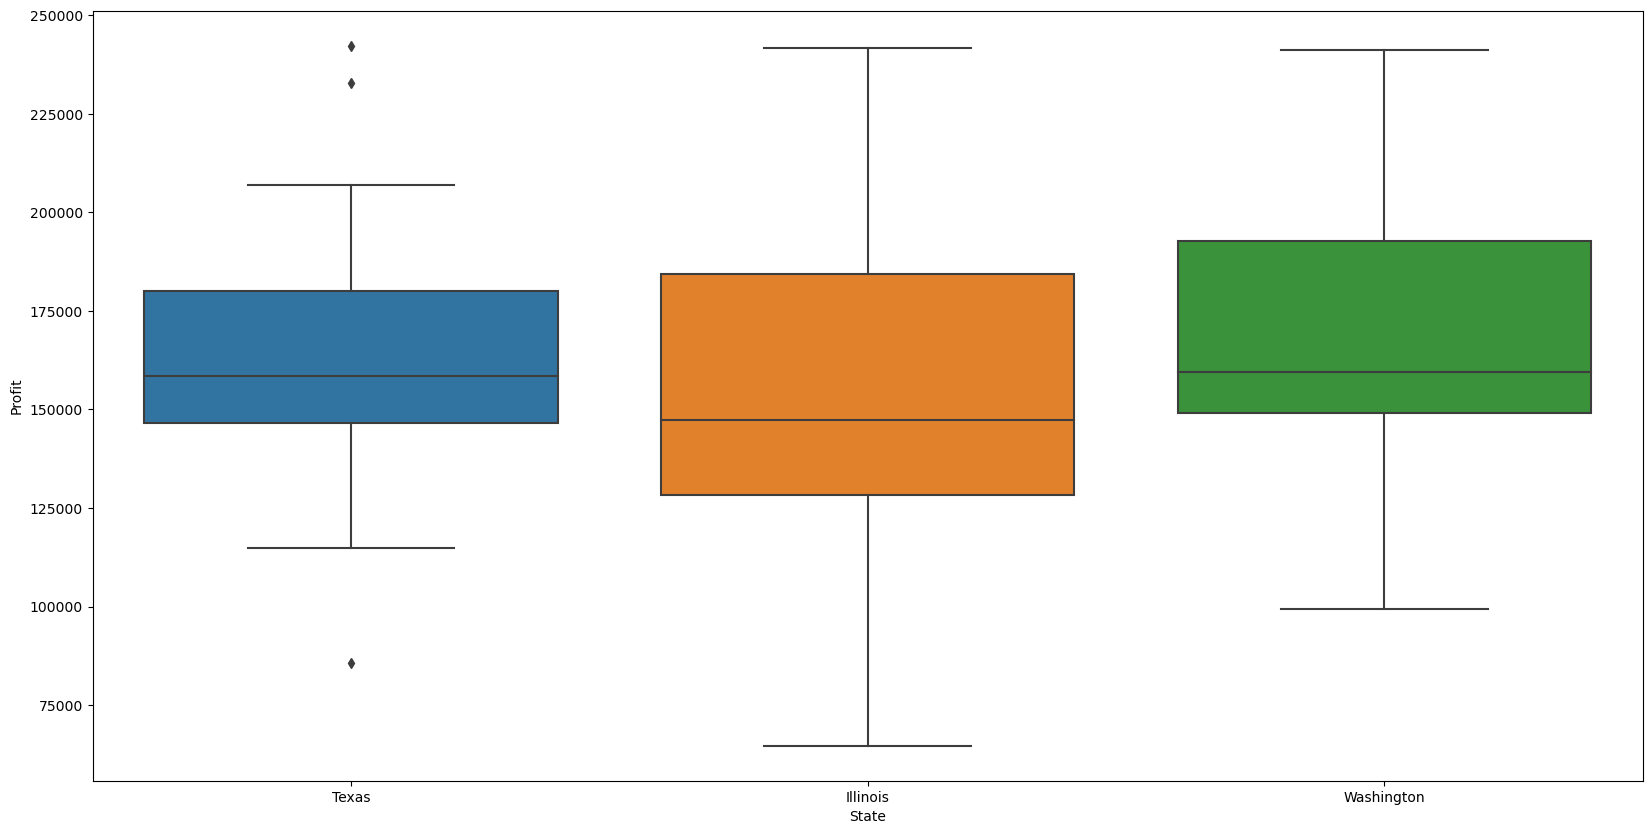

In [12]:
import seaborn as sns
sns.boxplot(x=df2['State'],y=df2['Profit'])

* Texas: The blue box shows Texas companies have a median profit around 17500, with some variability.
* Florida: The orange box indicates Florida companies’ median profit is slightly higher than Texas.
* Washington: The green box reveals Washington companies have the highest median profit, around 22500, compared to the other states.

#### Exploring Correlations Between Features:
> Visualize correlations using heatmaps or scatter plots.

**5. what relationship can be observed between ‘Features’ and ‘Profit’?**

<Axes: >

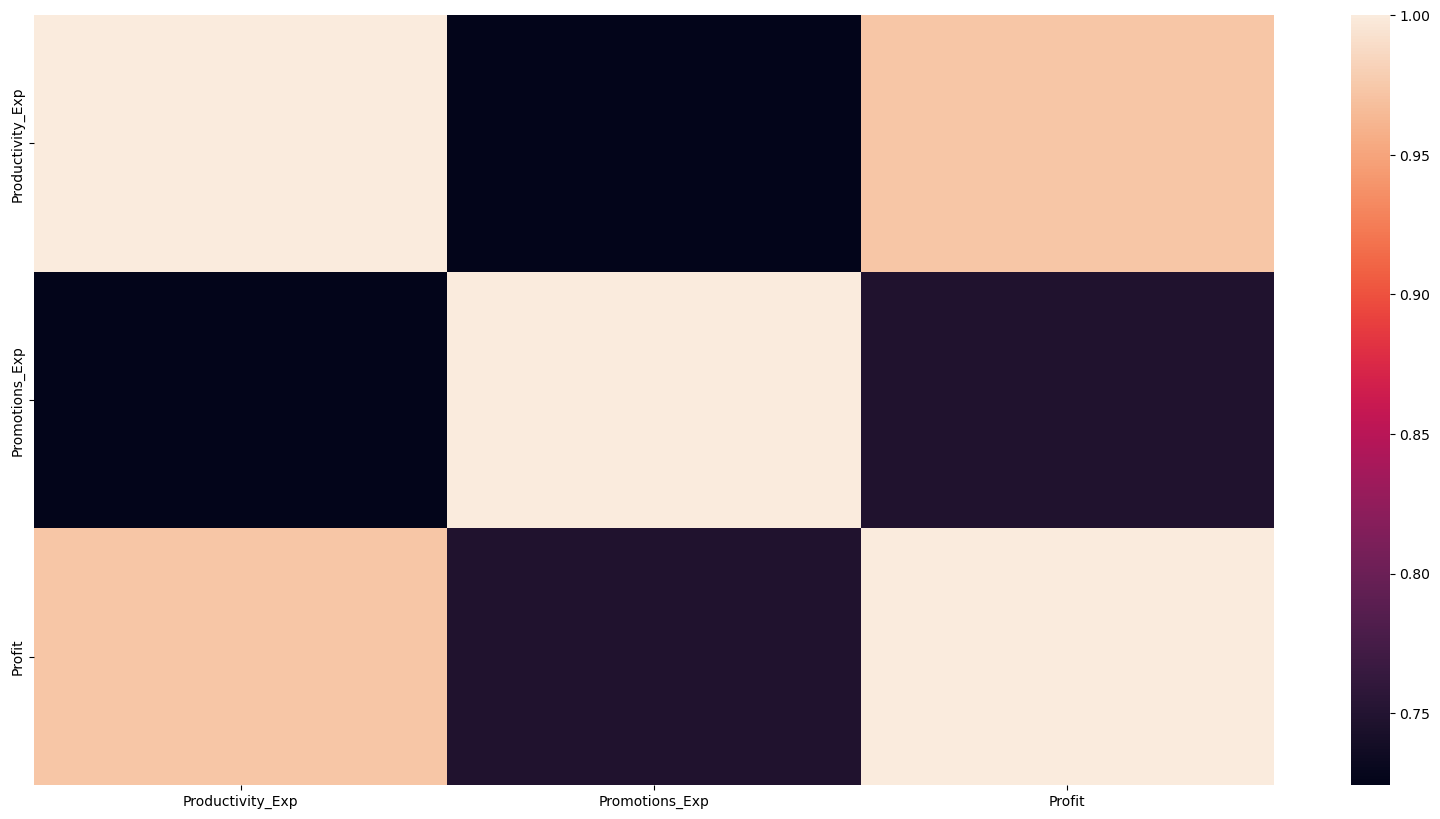

In [16]:
correlation_matrix = df2[["Productivity_Exp", "Promotions_Exp", "Profit"]].corr()
sns.heatmap(correlation_matrix)

* The colors range from light to dark, where darker shades mean a stronger relationship.
* Relationship: If the color in the cell where ‘Productivity_Exp’ or ‘Promotions_Exp’ meets ‘Profit’ is darker, it means that feature strongly influences profit. Conversely, a lighter color means a weaker influence.

## Feature Engineering:

**6.How does one-hot encoding handle categorical variables in a dataset?**

In [18]:
one_hot_encoded_df = pd.get_dummies(df2, columns=['State'])
one_hot_encoded_df

,Productivity_Exp,Promotions_Exp,Profit,State_Illinois,State_Texas,State_Washington
0,220349.20,521784.10,242261.83,0,1,0
1,217597.70,493898.53,241792.06,1,0,0
2,208441.51,457934.54,241050.39,0,0,1
3,199372.41,433199.62,232901.99,0,1,0
4,197107.34,416168.42,216187.94,0,0,1
5,186876.90,412861.36,206991.12,0,1,0
6,189615.46,177716.82,206122.51,1,0,0
7,185298.13,373876.68,205752.60,0,0,1
8,175542.52,361613.29,202211.77,0,1,0
9,178334.88,354981.62,199759.96,1,0,0


**7.What is the purpose of min-max scaling in data preprocessing?**

### Scaling Numerical Features (Min-Max Scaling)  :
> Min-max scaling transforms features to a specified range (typically between 0 and 1).Ensuring that numerical features are on a similar scale to improve model performance.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df2[["Productivity_Exp", "Promotions_Exp"]])

array([[1.        , 1.        ],
       [0.98335946, 0.94089337],
       [0.92798459, 0.8646636 ],
       [0.87313643, 0.81223513],
       [0.85943772, 0.77613557],
       [0.797566  , 0.76912588],
       [0.81412828, 0.27071031],
       [0.7880179 , 0.68649342],
       [0.72901786, 0.66049977],
       [0.74590551, 0.64644319],
       [0.61635061, 0.48573267],
       [0.60884455, 0.52936195],
       [0.56766982, 0.52956308],
       [0.55635219, 0.53555202],
       [0.72539353, 0.54370828],
       [0.69261666, 0.55486446],
       [0.47180821, 0.56031151],
       [0.57246821, 0.59894835],
       [0.55488118, 0.62511553],
       [0.52264964, 0.        ],
       [0.46116861, 0.63305328],
       [0.47408436, 0.63532724],
       [0.4475048 , 0.64291963],
       [0.40842369, 0.64599195],
       [0.46594728, 0.29796428],
       [0.39107967, 0.29242745],
       [0.45557444, 0.28413435],
       [0.43609283, 0.74861321],
       [0.39946683, 0.25042853],
       [0.39676926, 0.22709197],
       [0.

**8.How can the effectiveness of each expenditure category be quantified in terms of its impact on profit?**

#### Profit per Expenditure Category :
>This helps quantify how effectively each expenditure impacts profit.

In [20]:
one_hot_encoded_df["Profit_per_Productivity"] = one_hot_encoded_df["Profit"] / one_hot_encoded_df["Productivity_Exp"]
one_hot_encoded_df["Profit_per_Promotions"] = one_hot_encoded_df["Profit"] / one_hot_encoded_df["Promotions_Exp"]
one_hot_encoded_df["Profit_per_Productivity"]

0     1.099445
1     1.111188
2     1.156441
3     1.168176
4     1.096803
5     1.107634
6     1.087055
7     1.110387
8     1.151925
9     1.120140
10    1.249876
11    1.247877
12    1.286986
13    1.253856
14    1.043782
15    1.061310
16    1.330643
17    1.171814
18    1.187515
19    1.221731
20    1.283574
21    1.209338
22    1.243093
23    1.295444
24    1.200751
25    1.315378
26    1.194927
27    1.219505
28    1.266257
29    1.252055
30    1.281578
31    1.269917
32    1.245074
33    1.328389
34    1.446500
35    1.450091
36    1.681830
37    1.412630
38    1.744381
39    1.400255
40    1.531144
41    1.541734
42    1.544978
43    1.698571
44    1.492663
45    2.052243
46    1.766669
47    1.682904
48    1.542496
49    1.176025
Name: Profit_per_Productivity, dtype: float64

In [21]:
one_hot_encoded_df["Profit_per_Promotions"]

0     0.464295
1     0.489558
2     0.526386
3     0.537632
4     0.519472
5     0.501357
6     1.159837
7     0.550322
8     0.559193
9     0.562733
10    0.702541
11    0.648083
12    0.638960
13    0.608948
14    0.595742
15    0.577071
16    0.563051
17    0.527312
18    0.505239
19    3.455537
20    0.483198
21    0.461241
22    0.453845
23    0.447429
24    0.831967
25    0.837424
26    0.846148
27    0.384461
28    0.911591
29    0.960966
30    1.062398
31    1.067034
32    1.534344
33    0.554647
34    0.562554
35    0.573266
36    0.560307
37    0.566528
38    0.557792
39    0.582250
40    0.575594
41    0.595880
42    0.613625
43    1.400130
44    1.470616
45    2.214208
46    0.286622
47    1.851195
48    1.713468
49    0.679619
Name: Profit_per_Promotions, dtype: float64

**9.How can we divide data into training and testing sets in machine learning?**

### Spliting Data into Training and Testing Sets :
* **Training set:** Used to train the ML model.
* **Validation (or test) set:** Used to evaluate model accuracy.

In [22]:
from sklearn.model_selection import train_test_split
X = one_hot_encoded_df.drop(columns=["Profit"]) 
y = one_hot_encoded_df["Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
X_test

,Productivity_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington,Profit_per_Productivity,Profit_per_Promotions
10,156913.08,279160.95,0,0,1,1.249876,0.702541
13,146992.39,302664.93,1,0,0,1.253856,0.608948
19,141419.70,50000.00,0,1,0,1.221731,3.455537
12,148863.75,299839.44,0,0,1,1.286986,0.638960
5,186876.90,412861.36,0,1,0,1.107634,0.501357
3,199372.41,433199.62,0,1,0,1.168176,0.537632
31,116136.38,138218.23,0,1,0,1.269917,1.067034
36,83663.76,251126.82,0,0,1,1.681830,0.560307
26,130328.87,184050.07,0,0,1,1.194927,0.846148
0,220349.20,521784.10,0,1,0,1.099445,0.464295


**10.Which model is being used as the starting point for training in this project?**

### Model Training 
> For this project, I am using Linear Regression as a starting point. and Training the model using the training data.

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([190078.66899907, 181465.16898111, 201061.22371932, 183318.40468316,
       206129.95299943, 227500.21941205, 148966.39425225, 146636.59372054,
       155563.1851013 , 243176.47267334, 169884.75534383, 159506.42329699,
       141198.62826042, 113335.8399412 , 143716.13330148, 153357.48290133,
       198659.63658463, 135788.40299316, 157397.74204426, 222912.98178202,
       133690.84623668, 145209.33562877, 118304.64493129, 172678.93025377,
       147306.86043126, 149735.61347283, 188457.09882209, 135768.657665  ,
       182948.69096512, 159548.79122609, 237177.26691378, 142587.7902348 ,
       133827.99280123, 163644.84035999, 131927.63611725, 203617.1165641 ,
       151693.4637437 , 141393.64120521, 152072.20247879, 142760.99748219])

> The y_pred array contains predicted profit values for the validation set. Each value corresponds to a company’s predicted profit based on the model’s learned relationships between features (expenditure categories) and profit.


**11.What metrics can be used to evaluate model performance ?**

### Model Evaluation 
> Evaluating the model’s performance on the validation set.
By using metrics like **Mean Squared Error (MSE), R-squared**

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 234076510.43
R-squared: 0.83


**12.How can the coefficients of a linear regression model be used to evaluate its performance in predicting profit?**

### Interpretation:
>Interpreting the model coefficients (for linear regression). and
understanding which features contribute most to profit prediction.

In [107]:
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Model Coefficients:
Productivity_Exp: 1.21
Promotions_Exp: -0.06
Profit_per_Productivity: 77921.52
Profit_per_Promotions: -15875.09
State_Illinois: 550.63
State_Texas: -453.36
State_Washington: -97.27


### Conclusion :
> The model is quite effective in predicting profit, with productivity being a key positive driver. Promotions do not seem to contribute significantly to profit, and there are notable differences based on the state. 